In [1]:
#!pip freeze > ../requests.txt
#!pip install sklearn
#!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='mixed')

In [8]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [9]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [10]:
estacao_df#.isna().sum()
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [11]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [12]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [13]:
dados_df.dropna(inplace=True)

In [14]:
dados_df.chuva.unique()

array([ 0. ,  0.2,  1.2,  2.2,  9.2,  4. ,  0.4,  1.6,  0.8,  0.6,  3. ,
        1.8,  5.6,  2.4,  2.8, 16.8,  3.6,  4.2,  3.4,  2. ,  6.8,  6.2,
        3.8,  4.6,  1. , 15.2,  8.2])

<Axes: >

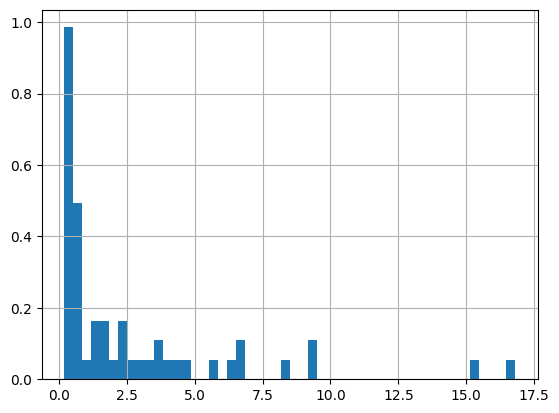

In [15]:
#dados_df.chuva.hist(density=True, bins=20)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(density=True, bins=50)

<Axes: >

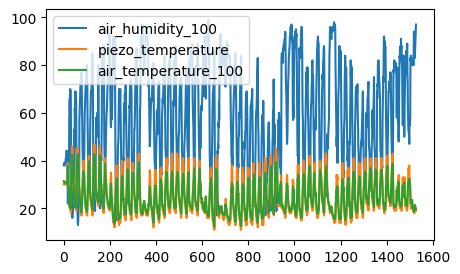

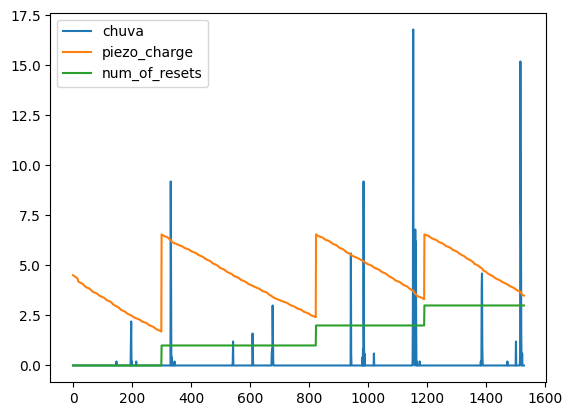

In [16]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
dados_df[['air_humidity_100']].plot(ax=ax)
dados_df[['piezo_temperature']].plot(ax=ax)
dados_df[['air_temperature_100']].plot(ax=ax)

#plt.subplot(122)
ax2 = dados_df[['chuva']].plot()
(dados_df[['piezo_charge']]/10000).plot(ax=ax2)
dados_df[['num_of_resets']].plot(ax=ax2)


#ax = plt.hist(sensor_df.piezo_charge)

In [17]:
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)#.apply(np.log)
rms = np.sqrt(dados_df.groupby('num_of_resets').dif_charge.apply(lambda x: x**2).mean())
#dados_df['dif_charge'] = dados_df.dif_charge.apply(np.log)
dados_df.dropna(inplace=True)
#dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])#.apply(np.log).apply(np.abs)
dados_df['dif_charge'] = (dados_df['dif_charge']-rms)/100#.apply(np.log).apply(np.abs)
#aux = dados_df[dados_df.num_of_resets.eq(1)]
#aux.piezo_charge.diff(-1)


In [18]:
dados_df.isna().sum()

Datetime – utc         0
air_humidity_100       0
air_temperature_100    0
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
data                   0
chuva                  0
dif_charge             0
dtype: int64

<Axes: >

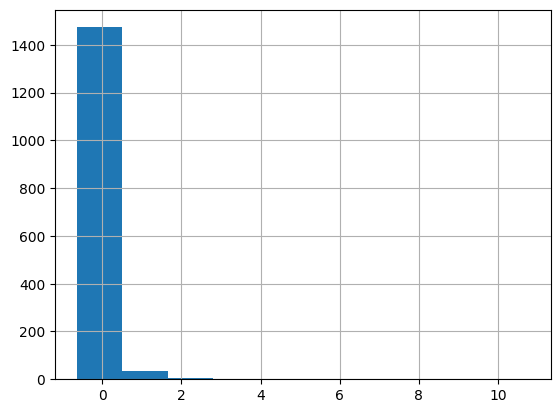

In [19]:
dados_df.dif_charge.hist()

<Axes: >

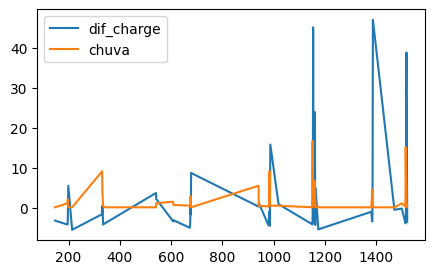

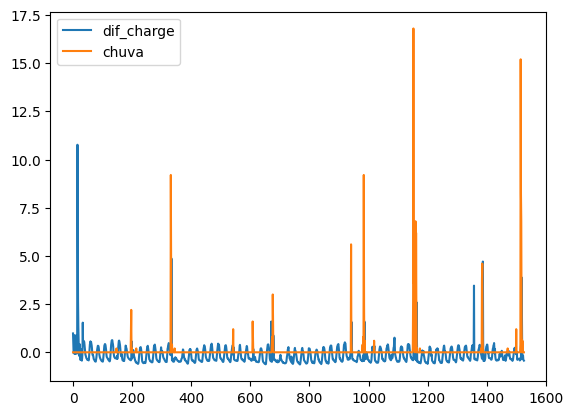

In [20]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]*10).plot(ax=ax)
(dados_df.loc[dados_df.chuva.gt(0),['chuva']]).plot(ax=ax)

#plt.subplot(122)
ax2 = (dados_df[['dif_charge']]).plot()
(dados_df[['chuva']]).plot(ax=ax2)


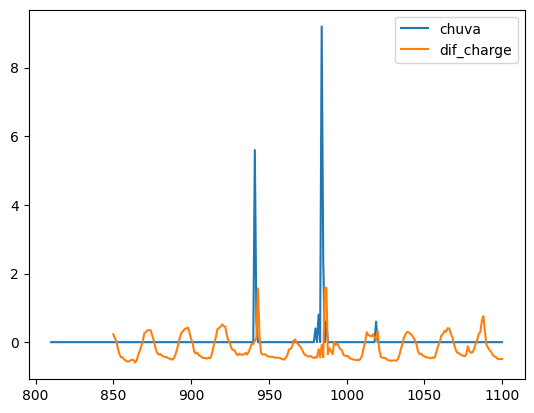

In [21]:
ax = dados_df.loc[810:1100].chuva.plot(label='chuva')
(dados_df.loc[850:1100,['dif_charge']]).plot(ax=ax)
#dados_df.loc[810:1100].plot(kind='line',x='piezo_charge', y='chuva')
plt.legend()

In [22]:
dados_df[['piezo_temperature','air_temperature_100']]
dados_df['dif_temp'] = dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)

dados_df['extra'] = dados_df.dif_temp*dados_df.dif_charge

In [29]:
#dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1)
dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1 if x<=5 else 2)

In [30]:
dados_df

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,extra,precp
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00,0.0,0.978115,1.366,1.336105,0
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00,0.0,-0.041885,0.366,-0.015330,0
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00,0.0,-0.051885,0.322,-0.016707,0
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00,0.0,-0.061885,0.240,-0.014852,0
5,2020-10-01T04:00:00Z,39.0,30.828,9411,0,44632,30,2020-10-01 04:00:00,0.0,0.888115,0.828,0.735359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2020-12-03T18:00:00Z,83.0,21.420,9413,3,35287,20,2020-12-03 18:00:00,0.0,-0.321885,1.420,-0.457077,0
1523,2020-12-03T19:00:00Z,86.0,20.880,9412,3,35217,20,2020-12-03 19:00:00,0.0,-0.171885,0.880,-0.151259,0
1524,2020-12-03T20:00:00Z,90.0,20.980,9409,3,35132,19,2020-12-03 20:00:00,0.0,-0.381885,1.980,-0.756132,0
1525,2020-12-03T21:00:00Z,93.0,20.620,9408,3,35068,20,2020-12-03 21:00:00,0.0,-0.411885,0.620,-0.255369,0


import seaborn as sns

sns.heatmap(dados_df.corr(), annot=True)

# Calibrator

In [83]:
#!pip install hyperopt

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from hyperopt import STATUS_OK, fmin, tpe, hp, Trials

In [32]:
dados_df.columns


Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'extra',
       'precp'],
      dtype='object')

In [33]:
cols = ['air_humidity_100',
       'atm_pressure_main',
       'piezo_temperature', 'dif_charge', 'dif_temp', 'precp']

In [34]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

In [35]:
#X = dados_df.loc[~dados_df.chuva.eq(0),cols].copy()
X = dados_df[cols].copy()
y = X.pop('precp')
#y = 100*y 

In [36]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'piezo_temperature',
       'dif_charge', 'dif_temp'],
      dtype='object')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9583333333333334)

In [40]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       438
           1       0.33      0.07      0.11        15
           2       0.00      0.00      0.00         3

    accuracy                           0.96       456
   macro avg       0.43      0.35      0.36       456
weighted avg       0.94      0.96      0.94       456



c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [41]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [42]:
classifier_XGB.score(X_train,y_train), classifier_XGB.score(X_test,y_test)
print(classification_report(y_test, classifier_XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       438
           1       0.12      0.07      0.09        15
           2       0.00      0.00      0.00         3

    accuracy                           0.95       456
   macro avg       0.36      0.35      0.35       456
weighted avg       0.93      0.95      0.94       456



### Bootstraping Classifier

In [43]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [44]:
N = X_bst[X_bst.precp.eq(0)].shape[0]

In [45]:
#df_aux = X_bst[~X_bst.precp.eq(0)]
for n in range(1,len(X_bst.precp.unique())):
    df_aux = X_bst[X_bst.precp.eq(n)]
    df_aux = df_aux.sample(n=N, replace=True)
    X_bst = pd.concat([X_bst,df_aux])
    

In [46]:
df_aux

,air_humidity_100,atm_pressure_main,piezo_temperature,dif_charge,dif_temp,precp
1152,85.0,9382,20,-0.211885,0.84,2
331,62.0,9420,25,-0.151885,-0.54,2
984,96.0,9436,18,-0.081885,0.68,2
1517,85.0,9431,19,2.968115,0.80,2
1152,85.0,9382,20,-0.211885,0.84,2
...,...,...,...,...,...,...
331,62.0,9420,25,-0.151885,-0.54,2
331,62.0,9420,25,-0.151885,-0.54,2
1159,92.0,9403,20,-0.371885,0.44,2
1517,85.0,9431,19,2.968115,0.80,2


In [47]:
X_bst

,air_humidity_100,atm_pressure_main,piezo_temperature,dif_charge,dif_temp,precp
1177,95.0,9414,14,-0.511885,1.52,0
397,35.0,9461,32,0.168115,-2.52,0
1468,64.0,9447,26,-0.011885,2.60,0
1140,30.0,9354,37,0.068115,-3.38,0
1359,66.0,9425,22,-0.351885,2.22,0
...,...,...,...,...,...,...
331,62.0,9420,25,-0.151885,-0.54,2
331,62.0,9420,25,-0.151885,-0.54,2
1159,92.0,9403,20,-0.371885,0.44,2
1517,85.0,9431,19,2.968115,0.80,2


In [48]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [49]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9517543859649122)

In [51]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       438
           1       0.17      0.07      0.10        15
           2       0.00      0.00      0.00         3

    accuracy                           0.95       456
   macro avg       0.38      0.35      0.36       456
weighted avg       0.93      0.95      0.94       456



c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## Regressor

In [52]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'extra',
       'precp'],
      dtype='object')

In [53]:
cols = ['air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets',
       'piezo_temperature', 'chuva', 'dif_charge', 'dif_temp', 'extra']

In [54]:
#dados_df.loc[dados_df.chuva.gt(0),cols]

In [55]:
#X = dados_df.loc[~dados_df.chuva.eq(0),cols].copy()
X = dados_df.loc[dados_df.chuva.gt(0), cols].copy()
y = X.pop('chuva')
#y = y.apply(np.log) 

In [56]:
#plt.plot(X['air_humidity_100'], y)
#X['air_humidity_100'].plot()

In [57]:
X.columns

Index(['air_humidity_100', 'air_temperature_100', 'atm_pressure_main',
       'num_of_resets', 'piezo_temperature', 'dif_charge', 'dif_temp',
       'extra'],
      dtype='object')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [59]:
#X_train

In [60]:
calibrador_LR = LinearRegression()
calibrador_LR.fit(X_train, y_train)

LinearRegression()

In [61]:
calibrador_LR.score(X_train, y_train), calibrador_LR.score(X_test, y_test)

(0.08304896901371572, 0.08625710440279288)

In [62]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [63]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.0829929562072721, 0.08698729214559964)

In [64]:
calibrador_RFR = make_pipeline(StandardScaler(),RandomForestRegressor())
calibrador_RFR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [65]:
calibrador_RFR.score(X_train, y_train), calibrador_RFR.score(X_test, y_test)

(0.7669284130917051, 0.028224513350791902)

In [66]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

(0.8196128669797459, -0.04365908636842275)

In [68]:
xboost = XGBRegressor()
xboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
xboost.score(X_train, y_train), xboost.score(X_test, y_test)

(0.9999999582926948, -0.5551816808700625)

In [70]:
calibrador_SVR = SVR()
calibrador_SVR.fit(X_train, y_train)

SVR()

In [71]:
calibrador_SVR.score(X_train, y_train), calibrador_SVR.score(X_test, y_test)


(-0.22992044977168447, -0.3791128064011491)

In [72]:
calibrador_SGD = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))

In [73]:
#calibrador_SGD = SGDRegressor()
calibrador_SGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [74]:
calibrador_SGD.score(X_train, y_train), calibrador_SGD.score(X_test, y_test)

(0.07925608348651036, 0.09167941162148108)

### Hyperparameter optimization

In [95]:
seed = 2
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.default_rng(seed))
    return best

trial=Trials()
best_param=optimize(trial)


100%|██████████| 500/500 [03:51<00:00,  2.16trial/s, best loss: 47.775536290932024]


In [116]:
for a in best.items():
    print((a[1]))
    best[a[0]] = int(a[1])

best


5
3
4
134


{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 134}

In [117]:
#best_param#.score(X_test,y_test), best.score(X_train,y_train)
best_RF = RandomForestRegressor(**best)

In [118]:
best_RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=134)

### Bootstrap Regressor

In [75]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [76]:
N = 2000

In [77]:
X_bst = X_bst.sample(n=N, replace=True)

In [78]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [79]:
calibrador_RF = RandomForestRegressor(random_state=42, bootstrap=True)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador_RF.predict(X_test))

(1.0, -2.946993277356292)

In [81]:
df_aux = X_bst[~X_bst.chuva.eq(0)]
df_aux = df_aux.sample(n=N, replace=True)

AttributeError: 'DataFrame' object has no attribute 'chuva'

In [ ]:
X_bst = pd.concat([X_bst,df_aux], ignore_index=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

(1.0, -0.958008816711593)

## Stochastic Regression

<Axes: >

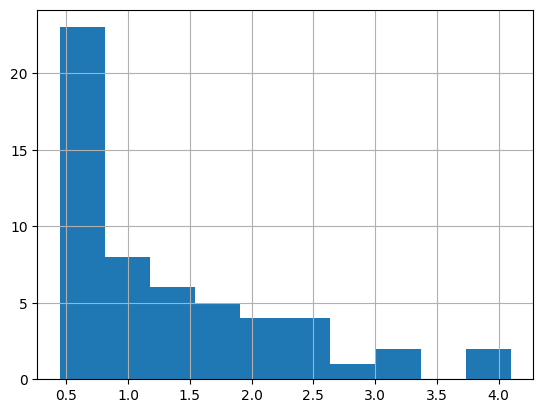

In [ ]:
dados_df[dados_df.chuva.gt(0)].chuva.apply(np.sqrt).hist()
#dados_df.hist()